In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
from chimera import Chimera

sns.set(style='ticks', context='notebook', font_scale=1.2)
from gryffin import Gryffin

In [2]:
df = pd.read_csv('si_table.csv')
df = df.rename(columns=lambda x: x.strip())
df

,composition,E_hull,mu_mu_B,PBE_fund_SOC,PBE_direct_SOC,HSE_fund,HSE_direct,m_star,m_e_star,m_h_star,E_f
0,H_3SInCl_3-1D-W,0.00,0.0,2.54(-0.00),2.64 (-0.00),,,7.11,7.14,>1000,-0.565
1,GCdBr_3-1D-W\bullet,0.00,0.0,3.44(-0.14),3.44 (-0.14),,,0.64,0.67,13.88,-0.507
2,GCdI_3-1D-W,0.00,0.0,2.35(-0.25),2.35 (-0.25),,,3.43,4.07,21.76,-0.393
3,NH_4GeCl_3-3D-OR,0.00,0.0,2.88(-0.04),2.88 (-0.04),,,0.50,1.38,0.79,-0.693
4,GCdCl_3-1D-W,0.00,0.0,4.13(-0.00),4.13 (-0.00),,,0.78,0.81,28.03,-0.583
...,...,...,...,...,...,...,...,...,...,...,...
198,GSnF_3-1D-W,0.01,0.0,3.95(-0.01),3.95 (-0.01),,,1.41,1.88,5.64,-0.964
199,NH_4CdBr_3-1D-W\bullet,0.01,0.0,2.93(-0.10),2.95 (-0.07),,,0.42,0.43,16.03,-0.653
200,NH_4BeCl_3,0.01,0.0,5.01(-0.01),5.14 (-0.00),6.38,6.51,0.46,0.51,4.93,-0.877
201,MPGeCl_3-2D,0.01,0.0,3.44(-0.01),3.71 (-0.01),,,1.46,1.52,39.72,-0.405


In [3]:
def process_bandgaps(pbe, hse=None):
    pbe = pbe.strip()
    pbe, soc = pbe.split('(')
    soc = soc.replace(')', '')
    pbe_gap = float(pbe) + float(soc)
    
    if hse is None:
        return pbe_gap
    
    hse = hse.strip()
    if hse != '':
        hse_gap = float(hse)
        return hse_gap
    else:
        return pbe_gap


pbes = list(df.loc[:, 'PBE_fund_SOC'])
hses = list(df.loc[:, 'HSE_fund'])

bandgaps = []

for pbe, hse in zip(pbes, hses):
    bg = process_bandgaps(pbe, None)
    bandgaps.append(bg)

df.loc[:, 'bandgap'] = bandgaps
df

,composition,E_hull,mu_mu_B,PBE_fund_SOC,PBE_direct_SOC,HSE_fund,HSE_direct,m_star,m_e_star,m_h_star,E_f,bandgap
0,H_3SInCl_3-1D-W,0.00,0.0,2.54(-0.00),2.64 (-0.00),,,7.11,7.14,>1000,-0.565,2.54
1,GCdBr_3-1D-W\bullet,0.00,0.0,3.44(-0.14),3.44 (-0.14),,,0.64,0.67,13.88,-0.507,3.30
2,GCdI_3-1D-W,0.00,0.0,2.35(-0.25),2.35 (-0.25),,,3.43,4.07,21.76,-0.393,2.10
3,NH_4GeCl_3-3D-OR,0.00,0.0,2.88(-0.04),2.88 (-0.04),,,0.50,1.38,0.79,-0.693,2.84
4,GCdCl_3-1D-W,0.00,0.0,4.13(-0.00),4.13 (-0.00),,,0.78,0.81,28.03,-0.583,4.13
...,...,...,...,...,...,...,...,...,...,...,...,...
198,GSnF_3-1D-W,0.01,0.0,3.95(-0.01),3.95 (-0.01),,,1.41,1.88,5.64,-0.964,3.94
199,NH_4CdBr_3-1D-W\bullet,0.01,0.0,2.93(-0.10),2.95 (-0.07),,,0.42,0.43,16.03,-0.653,2.83
200,NH_4BeCl_3,0.01,0.0,5.01(-0.01),5.14 (-0.00),6.38,6.51,0.46,0.51,4.93,-0.877,5.00
201,MPGeCl_3-2D,0.01,0.0,3.44(-0.01),3.71 (-0.01),,,1.46,1.52,39.72,-0.405,3.43


In [4]:
molcats = ['H3S', 'NH4', 'MS', 'MA', 'MP', 'FA', 'EA', 'G', 'AA', 'ED', 'tBA']
metals = ['Be', 'Mg', 'Ca', 'Sr', 'Ba', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Pd', 'Pt', 'Cu', 'Ag', 
          'Au', 'Zn', 'Cd', 'Hg', 'Ga', 'In', 'Tl', 'Si', 'Ge', 'Sn', 'Pb', 'Bi', 'S', 'Se', 'Te']
halogens = ['F', 'Cl', 'Br', 'I']

#print(len(molcats), len(metals), len(halogens), len(molcats)*len(metals)*len(halogens))


def process_composition(composition):
    stripped = composition.strip()
    replaced = stripped.replace('_', '')
    for rm in ['-1D-W', '-3D-OR', '-1D-W', '\\bullet', '-2D', '-1D-W', '-1D-R']:
        replaced = replaced.replace(rm, '')
        
    hoip = replaced
    
    # find molecular cation
    if hoip[0] == 'G':
        molcat = 'G'
        hoip = hoip[1:]
    elif hoip[:2] in molcats:
        molcat = hoip[:2]
        hoip = hoip[2:]
    elif hoip[:3] in molcats:
        molcat = hoip[:3]
        hoip = hoip[3:]
    else:
        raise ValueError(f'cannot parse {hoip}')
    
    # find metal
    if hoip[:2] in metals:
        metal = hoip[:2]
        hoip = hoip[2:]
    elif hoip[0] in metals:
        metal = hoip[0]
        hoip = hoip[1:]
    else:
        raise ValueError(f'cannot parse {hoip}')
    
    # find halogen
    if hoip[0] in halogens:
        halogen = hoip[0]
    elif hoip[:2] in halogens:
        halogen = hoip[:2]
    else:
        raise ValueError(f'cannot parse {hoip}')

    return molcat, metal, halogen
    
    
compositions = list(df.loc[:, 'composition'])

lst_mols = []
lst_mets = []
lst_hals = []

for composition in compositions:
    mol, met, hal = process_composition(composition)
    lst_mols.append(mol)
    lst_mets.append(met)
    lst_hals.append(hal)
    
df.loc[:, 'molcat'] = lst_mols
df.loc[:, 'metal'] = lst_mets
df.loc[:, 'halogen'] = lst_hals

df = df.drop(columns=['composition', 'PBE_fund_SOC', 'PBE_direct_SOC', 'HSE_fund', 'HSE_direct'])
df

,E_hull,mu_mu_B,m_star,m_e_star,m_h_star,E_f,bandgap,molcat,metal,halogen
0,0.00,0.0,7.11,7.14,>1000,-0.565,2.54,H3S,In,Cl
1,0.00,0.0,0.64,0.67,13.88,-0.507,3.30,G,Cd,Br
2,0.00,0.0,3.43,4.07,21.76,-0.393,2.10,G,Cd,I
3,0.00,0.0,0.50,1.38,0.79,-0.693,2.84,NH4,Ge,Cl
4,0.00,0.0,0.78,0.81,28.03,-0.583,4.13,G,Cd,Cl
...,...,...,...,...,...,...,...,...,...,...
198,0.01,0.0,1.41,1.88,5.64,-0.964,3.94,G,Sn,F
199,0.01,0.0,0.42,0.43,16.03,-0.653,2.83,NH4,Cd,Br
200,0.01,0.0,0.46,0.51,4.93,-0.877,5.00,NH4,Be,Cl
201,0.01,0.0,1.46,1.52,39.72,-0.405,3.43,MP,Ge,Cl


<AxesSubplot:xlabel='halogen', ylabel='Count'>

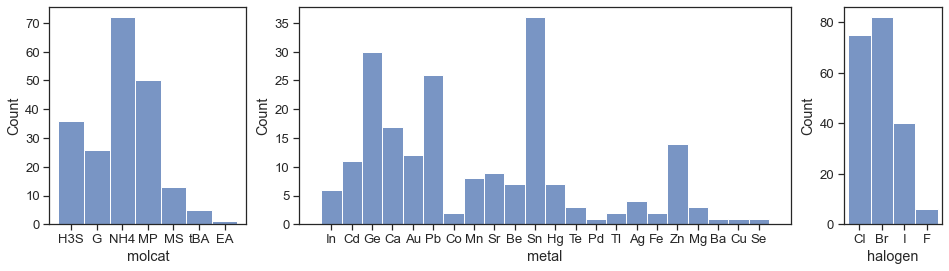

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4), gridspec_kw={'width_ratios': [1, 2.5, 0.5]})
sns.histplot(df.loc[:, 'molcat'], ax=axes[0])
sns.histplot(df.loc[:, 'metal'], ax=axes[1])
sns.histplot(df.loc[:, 'halogen'], ax=axes[2])

<AxesSubplot:xlabel='E_f', ylabel='Density'>

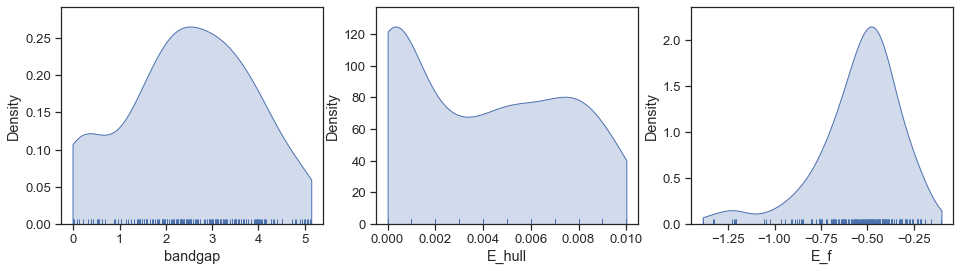

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

sns.kdeplot(df.loc[:, 'bandgap'], shade=True, cut=0, ax=axes[0])
sns.rugplot(df.loc[:, 'bandgap'], ax=axes[0])

sns.kdeplot(df.loc[:, 'E_hull'], shade=True, cut=0, ax=axes[1])
sns.rugplot(df.loc[:, 'E_hull'], ax=axes[1])

sns.kdeplot(df.loc[:, 'E_f'], shade=True, cut=0, ax=axes[2])
sns.rugplot(df.loc[:, 'E_f'], ax=axes[2])

In [7]:
# sort by stability
df = df.sort_values(by=['E_hull'])
# keep most stable entries
df = df.drop_duplicates(subset=['molcat', 'metal', 'halogen'], keep='first')
# drop entries with no effective mass
mask = df.loc[:, 'm_star'].str.strip() != ''
df = df.loc[mask, :]
# reorder
df

,E_hull,mu_mu_B,m_star,m_e_star,m_h_star,E_f,bandgap,molcat,metal,halogen
0,0.000,0.0,7.11,7.14,>1000,-0.565,2.54,H3S,In,Cl
32,0.000,20.0,44.46,>1000,44.46,-0.467,1.52,MP,Mn,Cl
34,0.000,0.0,0.34,0.35,6.64,-1.056,4.00,NH4,Ca,Br
35,0.000,0.0,0.52,1.09,0.99,-0.415,3.06,MP,Ge,Cl
36,0.000,0.0,363.95,>1000,417.06,-0.231,1.03,H3S,Te,Br
...,...,...,...,...,...,...,...,...,...,...
185,0.009,0.0,14.60,20.66,49.78,-0.623,2.47,H3S,Pb,Cl
193,0.010,0.0,1.04,1.12,14.48,-0.715,4.02,MS,Ca,Br
197,0.010,0.0,0.60,0.64,8.28,-0.696,4.28,MP,Sr,Br
198,0.010,0.0,1.41,1.88,5.64,-0.964,3.94,G,Sn,F


In [8]:
def process_mstar(mstar):
    mstar = mstar.strip()
    if mstar == '>1000':
        mstar = 1000.
    else:
        mstar = float(mstar)
    return mstar

mstars = []
for mstar in list(df.loc[:, 'm_star']):
    m = process_mstar(mstar)
    mstars.append(m)

df.loc[:, 'm_star'] = mstars
df

,E_hull,mu_mu_B,m_star,m_e_star,m_h_star,E_f,bandgap,molcat,metal,halogen
0,0.000,0.0,7.11,7.14,>1000,-0.565,2.54,H3S,In,Cl
32,0.000,20.0,44.46,>1000,44.46,-0.467,1.52,MP,Mn,Cl
34,0.000,0.0,0.34,0.35,6.64,-1.056,4.00,NH4,Ca,Br
35,0.000,0.0,0.52,1.09,0.99,-0.415,3.06,MP,Ge,Cl
36,0.000,0.0,363.95,>1000,417.06,-0.231,1.03,H3S,Te,Br
...,...,...,...,...,...,...,...,...,...,...
185,0.009,0.0,14.60,20.66,49.78,-0.623,2.47,H3S,Pb,Cl
193,0.010,0.0,1.04,1.12,14.48,-0.715,4.02,MS,Ca,Br
197,0.010,0.0,0.60,0.64,8.28,-0.696,4.28,MP,Sr,Br
198,0.010,0.0,1.41,1.88,5.64,-0.964,3.94,G,Sn,F


<AxesSubplot:xlabel='m_star', ylabel='Density'>

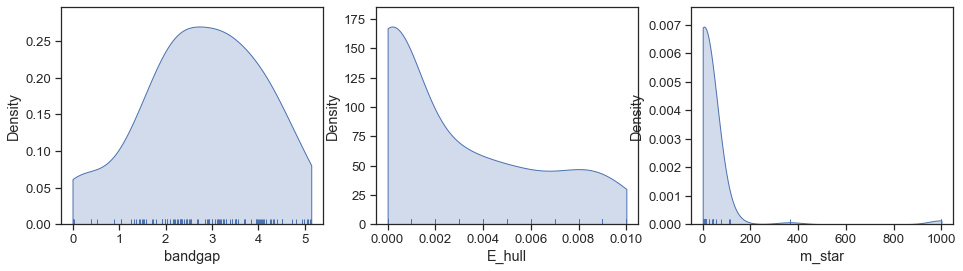

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))

sns.kdeplot(df.loc[:, 'bandgap'], shade=True, cut=0, ax=axes[0])
sns.rugplot(df.loc[:, 'bandgap'], ax=axes[0])

sns.kdeplot(df.loc[:, 'E_hull'], shade=True, cut=0, ax=axes[1])
sns.rugplot(df.loc[:, 'E_hull'], ax=axes[1])

sns.kdeplot(df.loc[:, 'm_star'], shade=True, cut=0, ax=axes[2])
sns.rugplot(df.loc[:, 'm_star'], ax=axes[2])

In [10]:
def stable_hoip(mol, met, hal):
    match = df.loc[(df['molcat'] == mol) & 
                   (df['metal'] == met)  &  
                   (df['halogen'] == hal)]
    
    if len(match) == 0:
        return False
    else:
        return True

In [11]:
all_hoip = {}
for mol in molcats:
    for met in metals:
        for hal in halogens:
            all_hoip[f'{mol}-{met}-{hal}'] = stable_hoip(mol, met, hal)

In [12]:
n_stable = sum(list(all_hoip.values()))
n_hoip = len(list(all_hoip.values()))
print(f'{n_stable} stable compositions out of {n_hoip} possible HOIPs ({n_stable/n_hoip*100:.1f}%)')

111 stable compositions out of 1276 possible HOIPs (8.7%)


1276

In [40]:
# target properties:
# (1) bandgap between 0.75 and 1.75 eV
# (2) effective mass less than 4

mask = (df.loc[:, 'bandgap'] > 0.75) & (df.loc[:, 'bandgap'] < 1.75) & (df.loc[:, 'm_star'] < 4.)

print(f'{len(df.loc[mask, :])} good compositions out of {n_hoip} possible HOIPs ({len(df.loc[mask, :])/n_hoip*100:.2f}%)')
print()

df.loc[mask, :]

7 good compositions out of 1276 possible HOIPs (0.55%)



,E_hull,mu_mu_B,m_star,m_e_star,m_h_star,E_f,bandgap,molcat,metal,halogen
47,0.000,0.0,1.76,9.12,2.19,-0.479,1.72,NH4,Sn,I
58,0.000,0.0,2.50,7.51,3.76,-0.528,1.25,NH4,Pb,I
23,0.000,0.0,0.22,0.58,0.35,-0.373,1.44,MP,Sn,Br
79,0.002,0.0,3.79,3.80,935.51,-0.668,1.48,NH4,Tl,Cl
99,0.003,0.0,0.23,0.58,0.37,-0.368,1.70,H3S,Ge,Br
118,0.005,0.0,0.32,0.32,39.23,-0.296,1.57,H3S,Cd,I
189,0.009,-0.0,1.07,1.11,33.31,-0.629,1.53,NH4,In,Br


In [14]:
mask = (df.loc[:, 'bandgap'] > 0.75) & (df.loc[:, 'bandgap'] < 1.75)
df.loc[mask, :]

,E_hull,mu_mu_B,m_star,m_e_star,m_h_star,E_f,bandgap,molcat,metal,halogen
32,0.000,20.0,44.46,>1000,44.46,-0.467,1.52,MP,Mn,Cl
36,0.000,0.0,363.95,>1000,417.06,-0.231,1.03,H3S,Te,Br
43,0.000,0.0,40.75,49.20,237.09,-0.514,0.89,NH4,Au,Cl
47,0.000,0.0,1.76,9.12,2.19,-0.479,1.72,NH4,Sn,I
58,0.000,0.0,2.50,7.51,3.76,-0.528,1.25,NH4,Pb,I
31,0.000,0.0,8.15,10.33,38.51,-0.234,1.43,MS,Te,Br
28,0.000,20.0,42.24,>1000,42.27,-0.227,1.03,MP,Mn,I
23,0.000,0.0,0.22,0.58,0.35,-0.373,1.44,MP,Sn,Br
84,0.002,20.0,15.92,26.05,40.92,-0.358,1.37,MP,Mn,Br
79,0.002,0.0,3.79,3.80,935.51,-0.668,1.48,NH4,Tl,Cl


In [26]:
molcats = ['H3S', 'NH4', 'MS', 'MA', 'MP', 'FA', 'EA', 'G', 'AA', 'ED', 'tBA']
metals = ['Be', 'Mg', 'Ca', 'Sr', 'Ba', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Pd', 'Pt', 'Cu', 'Ag', 
          'Au', 'Zn', 'Cd', 'Hg', 'Ga', 'In', 'Tl', 'Si', 'Ge', 'Sn', 'Pb', 'Bi', 'S', 'Se', 'Te']
halogens = ['F', 'Cl', 'Br', 'I']

config = {
     "general": {
             "num_cpus": 1,
             "auto_desc_gen": False,
             "batches": 1,
             "sampling_strategies": 1,
             "boosted":  False,
             "caching": True,
             "random_seed": 42,
             "acquisition_optimizer": "genetic",
             "verbosity": 3
                },
    "parameters": [
        {"name": "molcat", "type": "categorical", "category_details": {x:None for x in molcats}},
        {"name": "metal", "type": "categorical", "category_details": {x:None for x in metals}},
        {"name": "halogen", "type": "categorical", "category_details": {x:None for x in halogens}}
    ],
    "objectives": [
        {"name": "bandgap", "goal": "min", "tolerance": 0.5, "absolute":True},  # i.e. 1.25 +/- 0.5 eV
        {"name": "m_star", "goal": "min", "tolerance": 4., "absolute":True}
    ]
}

In [21]:
df_results = pd.read_csv('df_results.csv')
df_results

,E_hull,mu_mu_B,m_star,m_e_star,m_h_star,E_f,bandgap,molcat,metal,halogen
0,0.000,0.0,7.11,7.14,>1000,-0.565,2.54,H3S,In,Cl
1,0.000,20.0,44.46,>1000,44.46,-0.467,1.52,MP,Mn,Cl
2,0.000,0.0,0.34,0.35,6.64,-1.056,4.00,NH4,Ca,Br
3,0.000,0.0,0.52,1.09,0.99,-0.415,3.06,MP,Ge,Cl
4,0.000,0.0,363.95,>1000,417.06,-0.231,1.03,H3S,Te,Br
...,...,...,...,...,...,...,...,...,...,...
106,0.009,0.0,14.60,20.66,49.78,-0.623,2.47,H3S,Pb,Cl
107,0.010,0.0,1.04,1.12,14.48,-0.715,4.02,MS,Ca,Br
108,0.010,0.0,0.60,0.64,8.28,-0.696,4.28,MP,Sr,Br
109,0.010,0.0,1.41,1.88,5.64,-0.964,3.94,G,Sn,F


In [22]:
def run_experiment(param):
    match = df_results.loc[(df_results['molcat'] == param['molcat']) & 
                           (df_results['metal'] == param['metal']) &  
                           (df_results['halogen'] == param['halogen'])]
    assert len(match) in [1, 0]
    if len(match) == 0:
        return np.nan, np.nan
    elif len(match) == 1:
        bandgap = np.abs(match.loc[:, 'bandgap'].to_numpy()[0] - 1.25)
        m_star = match.loc[:, 'm_star'].to_numpy()[0]
        return bandgap, m_star
    else:
        raise ValueError()
    
    
def eval_merit(param):
    bandgap, m_star = run_experiment(param)
    param['bandgap'] = bandgap
    param['m_star'] = m_star
    return param

In [27]:
gryffin = Gryffin(config_dict=config)

In [28]:
observations = []
for i in range(5):
    params = gryffin.recommend(observations=observations)
    param = params[0]
    observation = eval_merit(param)
    observations.append(observation)
    print(observation)
    print()

Could not find any observations, falling back to random sampling

Memory usage: 0 GB, 382 MB, 582 kB

Overall time required: 9.5 ms

{'molcat': 'EA', 'metal': 'In', 'halogen': 'F', 'bandgap': nan, 'm_star': nan}


1 observations found

Bayesian neural network trained in 2.3 s

1200 random proposals drawn in 1.0 ms

1200 proposals optimized in 1.1 s using 1 CPUs

Acquisition tasks for 1 sampling strategy performed in 1.1 s

1 sample selected in 208.5 ms

Memory usage: 0 GB, 383 MB, 279 kB

Overall time required: 3.6 s

{'molcat': 'FA', 'metal': 'Mn', 'halogen': 'Br', 'bandgap': nan, 'm_star': nan}


2 observations found

Bayesian neural network trained in 2.1 s

1200 random proposals drawn in 0.7 ms

1200 proposals optimized in 1.3 s using 1 CPUs

Acquisition tasks for 1 sampling strategy performed in 1.3 s

1 sample selected in 322.2 ms

Memory usage: 0 GB, 385 MB, 695 kB

Overall time required: 3.8 s

{'molcat': 'NH4', 'metal': 'Cu', 'halogen': 'Cl', 'bandgap': nan, 'm_star': nan}


3 observations found

Bayesian neural network trained in 2.2 s

1200 random proposals drawn in 0.8 ms

1200 proposals optimized in 1.6 s using 1 CPUs

Acquisition tasks for 1 sampling strategy performed in 1.6 s

1 sample selected in 404.3 ms

Memory usage: 0 GB, 389 MB, 9 kB

Overall time required: 4.2 s

{'molcat': 'ED', 'metal': 'Ga', 'halogen': 'I', 'bandgap': nan, 'm_star': nan}


4 observations found

Bayesian neural network trained in 2.5 s

1200 random proposals drawn in 0.9 ms

1200 proposals optimized in 2.1 s using 1 CPUs

Acquisition tasks for 1 sampling strategy performed in 2.1 s

1 sample selected in 486.9 ms

Memory usage: 0 GB, 392 MB, 286 kB

Overall time required: 5.1 s

{'molcat': 'MS', 'metal': 'Mn', 'halogen': 'I', 'bandgap': nan, 'm_star': nan}


In [33]:
chimera = Chimera(tolerances=[0.5, 4.0], absolutes=[True, True], goals=['min', 'min'])

In [35]:
obj0 = np.abs(df_results.loc[:, 'bandgap'] - 1.25)
obj1 = df_results.loc[:, 'm_star']

In [38]:
scalarized = chimera.scalarize(np.array([obj0, obj1]).T)
np.argmin(scalarized)

22

In [39]:
df_results.iloc[22, :]

E_hull                   0.0
mu_mu_B                  0.0
m_star                   2.5
m_e_star                7.51
m_h_star                3.76
E_f                   -0.528
bandgap                 1.25
molcat                   NH4
metal                     Pb
halogen                    I
Name: 22, dtype: object